In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
%matplotlib inline

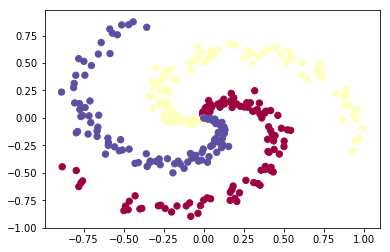

In [2]:
#Spiral Data
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

inputs = X
outputs = y

outputs = np.array(pd.get_dummies(outputs))

In [28]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def predict(inputs, w1, w2):
    a1 = np.matmul(inputs, w1) #a1= activation 1
    h1 = sigmoid(a1)
    a2 = np.matmul(h1, w2)
    hypothesis = sigmoid(a2)
    return hypothesis

def graph(w1, w2):
    plt.figure()
    xx, yy = make_meshgrid(inputs[:, 0], inputs[:, 1])
    Z = np.c_[xx.ravel(), yy.ravel()]

    Z = predict(Z, w1, w2)

    Z = np.argmax(Z, axis=1)

    Z = Z.reshape(xx.shape)
    cp = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(inputs[:, 0], inputs[:, 1], c=np.argmax(outputs, axis=1), cmap=plt.cm.coolwarm, s=20, edgecolors='k')


In [5]:
def sigmoid(x, derivative = False):
    e_x = np.exp(x)
    sigma = e_x / (e_x + 1)
    if (derivative):
        return sigma * (1 - sigma)
    else:
        return sigma

500.25640564919985
35.51016523986861
28.369541151720945
25.786711011041852
24.227438490658724
23.107775969963704
22.22544960907515
21.488219981735327
20.851015336729994
20.289140295348112


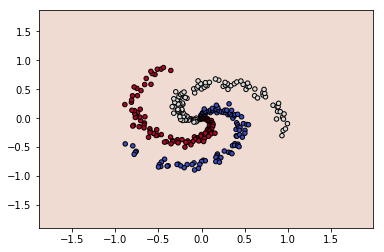

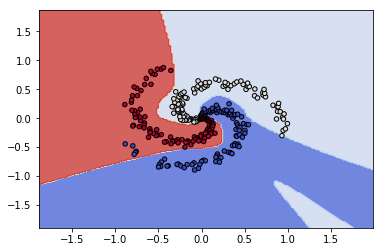

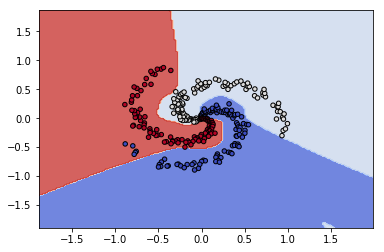

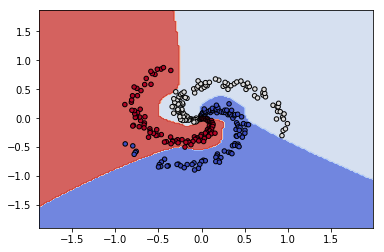

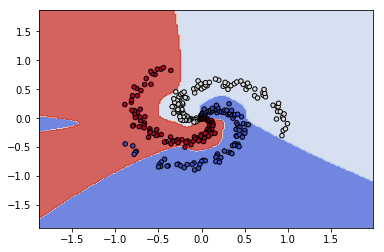

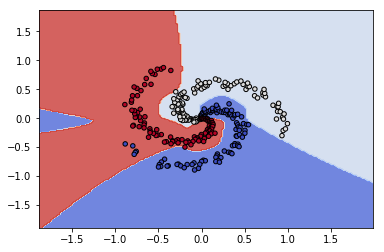

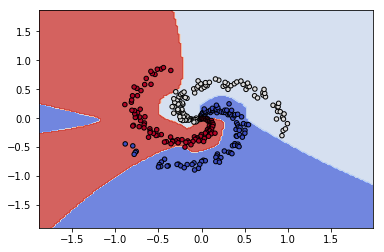

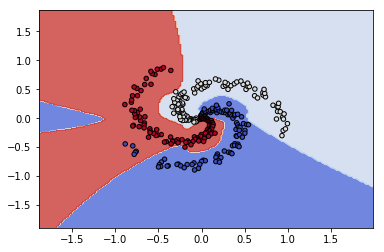

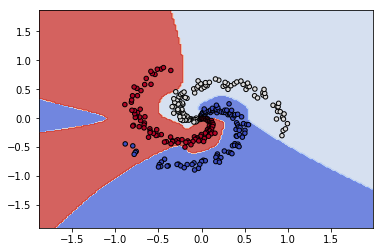

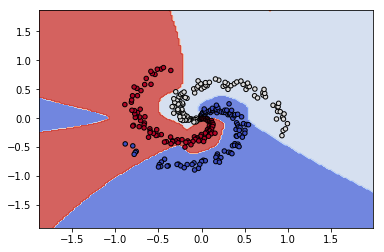

In [30]:
hidden_neurons = 10
w1 = np.random.random((inputs.shape[1], hidden_neurons))
w2 = np.random.random((hidden_neurons, outputs.shape[1]))

epochs = 50000
learning_rate = .01
for i in range(epochs):
    a1 = np.matmul(inputs, w1) #a1= activation 1
    h1 = sigmoid(a1)
    a2 = np.matmul(h1, w2)
    hypothesis = sigmoid(a2)
    
    #Done with forward propagation
    
    errorish = hypothesis - outputs  #dE/dO
    dE_dA2 = sigmoid(a2, True) * errorish #dO/dA2 * dE/dO
    
    dE_dW2 = np.matmul(h1.T, dE_dA2) #Not needed for previous layers
    
    dE_dH1 = np.matmul(dE_dA2, w2.T)
    dE_dA1 = sigmoid(a1, True) * dE_dH1
    dE_dW1 = np.matmul(inputs.T, dE_dA1)
    w1 = w1 - (dE_dW1 * learning_rate)
    w2 = w2 - (dE_dW2 * learning_rate) 
    
    if i % 5000 == 0:
        graph(w1, w2)
        print (np.mean(np.sum(errorish**2)))
        
        

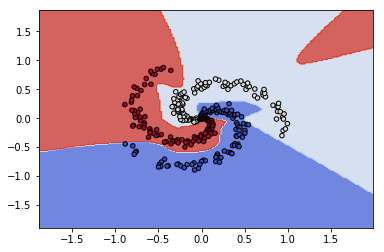

In [29]:
graph(w1, w2)